In [22]:
import scanpy as sp

data = sp.read_h5ad('../data/haniffa21.processed.h5ad', backed='r')

OSError: Unable to open file (file is already open for read-only)

In [3]:
import pandas as pd
import numpy as np

data.X

<HDF5 sparse dataset: format 'csr', shape (647366, 24929), type '<f4'>

In [30]:
sp.pl.highest_expr_genes(data, n_top=20)

AttributeError: 'SparseDataset' object has no attribute 'sum'

In [32]:
sp.pp.neighbors(data, n_neighbors=20, n_pcs=40)

In [4]:
sp.tl.umap(data)

In [5]:
data.obs.sample_id.unique()

['MH9179824', 'newcastle65', 'MH9143327', 'MH9143326', 'MH9143325', ..., 'BGCV14_CV0050', 'BGCV15_CV0944', 'BGCV15_CV0176', 'BGCV15_CV0257', 'BGCV15_CV0231']
Length: 143
Categories (143, object): ['AP1', 'AP2', 'AP3', 'AP4', ..., 'newcastle49', 'newcastle59', 'newcastle65', 'newcastle74']

In [9]:
data

AnnData object with n_obs × n_vars = 647366 × 24929 backed at '../data/haniffa21.processed.h5ad'
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [10]:
data.obs.Swab_result

covid_index
AAACCTGAGAAACCTA-MH9179824    Positive
AAACCTGAGAGTAATC-MH9179824    Positive
AAACCTGAGAGTGAGA-MH9179824    Positive
AAACCTGAGGAATCGC-MH9179824    Positive
AAACCTGAGTGTTGAA-MH9179824    Positive
                                ...   
BGCV15_TTTGTCAAGGCGATAC-1     Positive
BGCV15_TTTGTCACAAGCCATT-1     Negative
BGCV15_TTTGTCACAGACACTT-1     Positive
BGCV15_TTTGTCAGTTACGGAG-1     Positive
BGCV15_TTTGTCATCGAATGGG-1     Positive
Name: Swab_result, Length: 647366, dtype: category
Categories (4, object): ['Healthy', 'LPS', 'Negative', 'Positive']

In [ ]:
sp.pl.umap(data, color='CST3')

In [ ]:
sp.pl.pca(data, color=data.var_names)

KeyError: 'Could not find key leiden in .var_names or .obs.columns.'

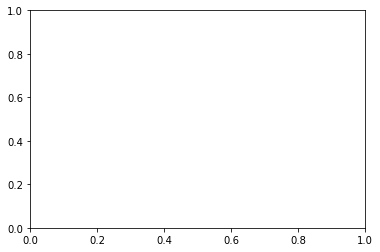

In [35]:
sp.pl.pca(data, color='leiden')

In [27]:
data.X

<HDF5 sparse dataset: format 'csr', shape (647366, 24929), type '<f4'>

In [33]:
data.X[0:100]

<100x24929 sparse matrix of type '<class 'numpy.float32'>'
	with 135477 stored elements in Compressed Sparse Row format>

In [4]:
sp.tl.leiden(data, key_added='clusters', resolution=0.5)

ValueError: You need to run `pp.neighbors` first to compute a neighborhood graph.

In [9]:
data.var_names[data.var_names=='']

Index(['LINC00115'], dtype='object')

In [8]:
data.var_names

Index(['MIR1302-2HG', 'AL627309.1', 'AL627309.3', 'AL627309.2', 'AL669831.2',
       'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.2', 'SAMD11',
       ...
       'AB_CD101', 'AB_IL21R', 'AB_C5AR1', 'AB_HLA-F', 'AB_NLRP2',
       'AB_Podocalyxin', 'AB_GGT1', 'AB_c-Met', 'AB_LIGHT', 'AB_DR3'],
      dtype='object', length=24929)

In [13]:
subset_data = data.X[:100]

In [17]:
data.obs.shape

(647366, 23)

In [15]:
df = pd.DataFrame(subset_data.toarray(), columns=data.var_names)

In [16]:
df

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.2,AL669831.2,FAM87B,LINC00115,FAM41C,AL645608.2,SAMD11,...,AB_CD101,AB_IL21R,AB_C5AR1,AB_HLA-F,AB_NLRP2,AB_Podocalyxin,AB_GGT1,AB_c-Met,AB_LIGHT,AB_DR3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625947,-0.085538,-0.232289,0.250930,-0.084674,-0.218926,-0.028993,0.034922,0.009421,-0.200650
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.610574,-0.050991,-0.079643,-0.316583,-0.108120,0.088621,0.181645,-0.180409,0.015938,-0.114951
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.228959,-0.146498,-0.020248,-0.190241,-0.094482,0.072296,0.232266,-0.275916,0.124552,-0.210458
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028613,-0.013865,-0.206373,-0.008390,-0.058759,-0.193011,0.235805,-0.173246,-0.265693,-0.475765
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404391,-0.160965,0.044466,-0.176680,0.015990,-0.118262,0.041708,0.010647,-0.367037,-0.276078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133571,-0.033846,-0.083687,-0.049560,0.033964,0.133796,0.168827,-0.214416,0.061113,-0.148959
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.077058,-0.119536,0.034743,-0.135251,-0.118673,0.224196,0.083136,-0.300107,-0.024578,-0.359588
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.348600,0.050850,-0.220840,-0.010622,0.005956,-0.128296,-0.035273,-0.175478,-0.076040,-0.043073
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.156307,-0.409049,0.164359,-0.424764,-0.186337,0.001630,0.290948,-0.589620,-0.217180,-0.348070


In [38]:
sub_sample = sp.pp.subsample(data.X.to_memory(), n_obs=500)

KeyboardInterrupt: 

In [45]:
sp.pp.subsample(data.copy(filename='new_test.h5ad'), fraction=0.005)

TypeError: __init__() missing 1 required positional argument: 'dtype'

Above error raised while writing key 'X' of <class 'h5py._hl.files.File'> from /.

In [27]:
sub_sample

(<500x24929 sparse matrix of type '<class 'numpy.float32'>'
 	with 719635 stored elements in Compressed Sparse Row format>,
 array([438644, 350577, 592847, 144624, 221929,  44713, 172426, 456460,
        320328, 181269, 303933,  24200, 358914,   4711,  65007, 488367,
        628772, 600864, 322403,  54943, 456154, 465474, 548352, 442985,
         33819, 365944, 221887,  31761, 504554, 537029, 375902, 619432,
        157364,  14086, 115275, 221463, 310296, 613151, 359440, 422663,
        348635, 546619,  91793, 600426, 616338, 258718, 293954, 382964,
        591000, 279126, 527069, 524849, 458902, 202827, 221467, 126940,
        356016, 294959, 260463, 433825, 240250, 536643, 561934, 233664,
        334844, 310774, 181274, 453819, 468110, 436030, 578378, 145246,
        179088, 101407, 416807, 347862, 397423, 641760, 291411, 404605,
        592220, 554631, 130400, 311046, 137021, 246451, 522761, 397970,
         25630, 283535, 114219, 243264, 525069, 488842,  77866, 528990,
        3406

In [34]:
df = pd.DataFrame(sub_sample[0].toarray(), columns=data.var_names)

In [35]:
df

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.2,AL669831.2,FAM87B,LINC00115,FAM41C,AL645608.2,SAMD11,...,AB_CD101,AB_IL21R,AB_C5AR1,AB_HLA-F,AB_NLRP2,AB_Podocalyxin,AB_GGT1,AB_c-Met,AB_LIGHT,AB_DR3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.238154,-0.305279,-0.007163,-0.299618,-0.057126,-0.534458,0.043472,-0.060557,-0.433756,-0.042286
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024929,-0.149884,0.490876,-0.401201,0.078737,-0.659222,0.152605,0.050274,-0.539670,0.127867
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.052262,-0.309391,-0.084993,-0.013411,-0.088449,-0.097520,0.210003,-0.256167,-0.011841,-0.050966
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055347,0.109576,-0.065699,-0.098741,-0.013455,-0.117100,-0.093276,-0.002090,-0.169291,-0.027368
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.381768,-0.438069,0.001216,-0.126582,-0.107567,-0.039643,-0.001415,-0.060858,-0.227114,-0.336505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.411937,0.076780,-0.195767,0.067262,0.004905,-0.137311,-0.586130,-0.166261,0.420870,-0.181190
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047149,-0.131463,0.093950,0.016349,-0.006225,-0.129807,0.298809,-0.103718,-0.159361,-0.087557
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177697,-0.362872,-0.112310,0.028772,-0.171133,-0.108611,0.252194,0.053422,-0.131040,-0.073251
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414912,0.064923,0.166002,0.003003,-0.046071,0.019048,0.327422,-0.314702,-0.185036,-0.072495


In [ ]:
df.plot.